---
## 라이브러리 불러오기
---

In [160]:
import os
import sys
utils_path = os.path.join(os.path.join(os.environ['USERPROFILE']), 'Desktop','utils')
sys.path.append(utils_path)

from custom_function import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

---
## 데이터 확인
---

In [161]:
ab_df = pd.read_csv('ab_data.csv')
ab_df.head()

,Weight,Length,Species
0,242,25.4,A
1,290,26.3,A
2,340,26.5,A
3,363,29.0,A
4,430,29.0,A


In [162]:
ab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   55 non-null     int64  
 1   Length   55 non-null     float64
 2   Species  55 non-null     object 
dtypes: float64(1), int64(1), object(1)
memory usage: 1.4+ KB


In [163]:
ab_df['Species']=ab_df['Species'].astype('category')
ab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   Weight   55 non-null     int64   
 1   Length   55 non-null     float64 
 2   Species  55 non-null     category
dtypes: category(1), float64(1), int64(1)
memory usage: 1.2 KB


In [164]:
# 결측치 확인
check_na(ab_df,target=[0]) # 길이와 무게는 0보다 커야하기 때문에 0을 결측치에 포함..
print()
print('weight열에는 0이하의 값이 없습니다' if ab_df[ab_df['Weight']<=0].empty else 'weight열에는 0이하의 값이 있습니다',end='\n')
print('Length열에는 0이하의 값이 없습니다' if ab_df[ab_df['Length']<=0].empty else 'Length열에는 0이하의 값이 있습니다',end='\n')

ab_df.drop(ab_df[ab_df['Weight']<=0].index,inplace=True)

Weight열에 0값이 1개 있습니다.
결측치가 있습니다

weight열에는 0이하의 값이 있습니다
Length열에는 0이하의 값이 없습니다


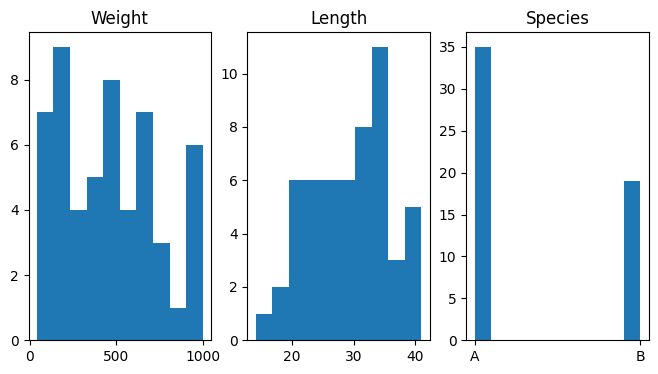

In [165]:
fig = plt.figure(figsize=(8,4))
rows = 1
cols = 3
idx = 0
for i in range(1,cols*rows+1):
    series = ab_df.iloc[:,idx]
    fig.add_subplot(rows,cols,i)
    plt.hist(series)
    plt.title(series.name)
    idx+=1
plt.show()

In [166]:
ab_df.corr()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_4260\1942001157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ab_df.corr()


,Weight,Length
Weight,1.000000,0.961988
Length,0.961988,1.000000


---
## 데이터 스케일링  
---

In [167]:
# 두가지 방법으로 스케일링
min_max_df = ab_df.copy()
standard_df = ab_df.copy()

In [168]:
for i in range(2):
    min_max_df.iloc[:,i] = min_max_scaler(min_max_df.iloc[:,i])
for i in range(2):
    standard_df.iloc[:,i] = standard_scaler(standard_df.iloc[:,i])

In [169]:
min_max_df.head()

,Weight,Length,Species
0,0.210417,0.420074,A
1,0.260417,0.453532,A
2,0.312500,0.460967,A
3,0.336458,0.553903,A
4,0.406250,0.553903,A


In [170]:
standard_df.head()

,Weight,Length,Species
0,-0.763410,-0.611191,A
1,-0.592783,-0.471210,A
2,-0.415047,-0.440104,A
3,-0.333288,-0.051269,A
4,-0.095122,-0.051269,A
